# Data Analysis

### Financial Well-Being Survey (CFPB, 2017)

**Problem statement**: How does financial literacy knowledge impact a marginalized population’s financial well-being, measured in indicators like debt to income rate and home ownership ability?

**Objectives**
* What's the correlation between financial knowledge and financial well-being, as measured by different indicators?
* Does financial knowledge have any relationship with a sub-population's financial well-being? Does it differ from the general population?
* If there is a difference, is there additional data we can explore? Is there a possible explanation or reasoning for such difference?
* What conclusions can we draw?
* Are there any recommendations we can make to public and private institutions to efficiently allocate resources to make the largest difference for the groups observed?

In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
cfpb_df = pd.read_csv("../data/NFWBS_PUF_2016_data.csv")

In [3]:
# Columns that most relate to our problem statement
columns_of_interest = [
    'PUF_ID',
    'agecat',
    'PPEDUC',
    'PPETHM',
    'PPGENDER',
    'PPINCIMP',
    'PPHHSIZE',
    'fpl',
    'PPREG4',
    'PPREG9',
    'FWB1_1',
    'FWB1_5',
    'FS2_3',
    'SUBKNOWL1',
    'ACT1_2',
    'PROPPLAN_3',
    'PROPPLAN_1',
    'MANAGE1_2',
    'MANAGE1_1',
    'MANAGE1_3',
    'SAVEHABIT',
    'AUTOMATED_1',
    'AUTOMATED_2',
    'SAVINGSRANGES',
    'HOUSING',
    'HOUSERANGES',
    'MORTGAGE',
    'PRODHAVE_8',
    'PRODUSE_1',
    'PRODUSE_2',
    'FWBscore',
    'FSscore'
]

In [4]:
# Value mapping to actual responses; might come in handy when doing EDA
value_map = {
    "agecat":{
      1: "18-24",
      2: "25-34",
      3: "35-44",
      4: "45-54",
      5: "55-61",
      6: "62-69",
      7: "70-74",
      8: "75+"
    },
    "PPEDUC":{
      1: "Less than high school",
      2: "High school degree/GED",
      3: "Some college/Associate",
      4: "Bachelors degree",
      5: "Graduate/professional degree"
    },
    "PPETHM":{
      1: "White, Non-Hispanic",
      2: "Black, Non-Hispanic",
      3: "Other, Non-Hispanic",
      4: "Hispanic"
    },
    "PPGENDER":{
      1: "Male",
      2: "Female"
    },
    "PPINCIMP":{
      1: "Less than $20,000",
      2: "$20,000 to $29,999",
      3: "$30,000 to $39,999",
      4: "$40,000 to $49,999",
      5: "$50,000 to $59,999",
      6: "$60,000 to $74,999",
      7: "$75,000 to $99,999",
      8: "$100,000 to $149,999",
      9: "$150,000 or more"
    },
    "PPHHSIZE":{
      1: "1",
      2: "2",
      3: "3",
      4: "4",
      5: "5+"
    },
    "fpl":{
      1: "<100% FPL",
      2: "100%-199% FPL",
      3: "200%+ FPL"
    },
    "PPREG4":{
      1: "Northeast",
      2: "Midwest",
      3: "South",
      4: "West"
    },
    "PPREG9":{
      1: "New England",
      2: "Mid-Atlantic",
      3: "East-North Central",
      4: "West-North Central",
      5: "South Atlantic",
      6: "East-South Central",
      7: "West-South Central",
      8: "Mountain",
      9: "Pacific"
    },
    "FWB1_1":{
      -4: "Response not written to database",
      -1: "Refused",
      1: "Not at all",
      2: "Very little",
      3: "Somewhat",
      4: "Very well",
      5: "Completely"
    },
    "FWB1_5":{
      -4: "Response not written to database",
      -1: "Refused",
      1: "Not at all",
      2: "Very little",
      3: "Somewhat",
      4: "Very well",
      5: "Completely"
    },
    "FS2_3":{
      -1: "Refused",
      1: "Never",
      2: "Rarely",
      3: "Sometimes",
      4: "Often",
      5: "Always"
    },
    "SUBKNOWL1":{
      -1: "Refused",
      1: "1 - Very low",
      2: "2",
      3: "3",
      4: "4",
      5: "5",
      6: "6",
      7: "7 - Very high"
    },
    "ACT1_2":{
      -1: "Refused",
      1: "Not at all",
      2: "Very little",
      3: "Somewhat",
      4: "Very well",
      5: "Completely"
    },
    "PROPPLAN_1":{
      -1: "Refused",
      1: "Strongly disagree",
      2: "Disagree",
      3: "Neither agree nor disagree",
      4: "Agree",
      5: "Strongly agree"
    },
    "PROPPLAN_3":{
      -1: "Refused",
      1: "Strongly disagree",
      2: "Disagree",
      3: "Neither agree nor disagree",
      4: "Agree",
      5: "Strongly agree"
    },
    "MANAGE1_1":{
      -1: "Refused",
      1: "Not applicable or never",
      2: "Seldom",
      3: "Sometimes",
      4: "Often",
      5: "Always"
    },
    "MANAGE1_2":{
      -1: "Refused",
      1: "Not applicable or never",
      2: "Seldom",
      3: "Sometimes",
      4: "Often",
      5: "Always"
    },
    "MANAGE1_3":{
      -1: "Refused",
      1: "Not applicable or never",
      2: "Seldom",
      3: "Sometimes",
      4: "Often",
      5: "Always"
    },
    "SAVEHABIT":{
      -1: "Refused",
      1: "Strongly disagree",
      2: "Disagree",
      3: "Disagree slightly",
      4: "Agree slightly",
      5: "Agree",
      6: "Strongly agree"
    },
    "AUTOMATED_1":{
      -1: "Refused",
      0: "No",
      1: "Yes",
      7: "I do not have this type of account"
    },
    "AUTOMATED_2":{
      -1: "Refused",
      0: "No",
      1: "Yes",
      7: "I do not have this type of account"
    },
    "SAVINGSRANGES":{
      -1: "Refused",
      1: "0",
      2: "$1-99",
      3: "$100-999",
      4: "$1,000-4,999",
      5: "$5,000-19,999",
      6: "$20,000-74,999",
      7: "$75,000 or more",
      98: "I dont know",
      99: "Prefer not to say"
    },
    "HOUSING":{
      -1: "Refused",
      1: "I own my home",
      2: "I rent",
      3: "I do not currently own or rent"
    },
    "HOUSERANGES":{
      -1: "Refused",
      1: "Less than $300",
      2: "$300-499",
      3: "$500-749",
      4: "$750-999",
      5: "$1,000-1,499",
      6: "$1,500-1,999",
      7: "$2,000 or more",
      98: "I dont know",
      99: "Prefer not to say"
    },
    "MORTGAGE":{
      -2: "Question not asked because respondent not in item base",
      -1: "Refused",
      1: "Less than $50,000",
      2: "$50,000-199,999",
      3: "$200,000 or more",
      98: "I dont know",
      99: "Prefer not to say"
    },
    "PRODHAVE_8":{
      0: "No",
      1: "Yes"
    },
    "PRODUSE_1":{
      0: "No",
      1: "Yes"
    },
    "PRODUSE_2":{
      0: "No",
      1: "Yes"
    },
    "FWBscore":{
      -4: "Response not written to database",
      -1: "Refused"
    },
    "FSscore":{
      -1: "Refused"
    },
}

In [5]:
# Column mapping to variable label; might come in handy when doing EDA
col_map = {
    'agecat':'Age Group',
    'PPEDUC':'Education (Highest Degree)',
    'PPETHM':'Race/Ethnicity',
    'PPGENDER':'Gender',
    'PPINCIMP':'Household Income',
    'PPHHSIZE':'Household Size',
    'fpl':'Federal Poverty Level',
    'PPREG4':'Census Region',
    'PPREG9':'Census Division',
    'FWB1_1':'I could handle a major unexpected expense.',
    'FWB1_5':'I am just getting by financially',
    'FS2_3':'I struggle to understand financial information',
    'SUBKNOWL1':'How would you assess your overall financial knowledge?',
    'ACT1_2':'I follow-through on financial goals I set for myself.',
    'PROPPLAN_3':'I set financial goals for what I want to achieve with my money',
    'PROPPLAN_1':'I consult my budget to see how much money I have left',
    'MANAGE1_2':'Stayed within your budget or spending plan',
    'MANAGE1_1':'Paid all your bills on time',
    'MANAGE1_3':'Paid off credit card balance in full',
    'SAVEHABIT':'Putting money into savings is a habit for me',
    'AUTOMATED_1':'A Retirement Savings Account',
    'AUTOMATED_2':'A Non-Retirement Savings Account',
    'SAVINGSRANGES':'How much money do you have in savings today?',
    'HOUSING':'Which one of the following best describes your housing situation?',
    'HOUSERANGES':'About how much do you pay for your home each month?',
    'MORTGAGE':'What do you owe on your home?',
    'PRODHAVE_8':'Student/Education Loan (for yourself or someone else)',
    'PRODUSE_1':'Used payday loan or cash advance loan',
    'PRODUSE_2':'Used pawn loan or auto title loan',
    'FWBscore':'Financial Well-Being Scale score',
    'FSscore':'Financial Skill Scale score'
}

In [6]:
cfpb_filtered_df = cfpb_df.loc[:,columns_of_interest]
cfpb_filtered_df.head()

,PUF_ID,agecat,PPEDUC,PPETHM,PPGENDER,PPINCIMP,PPHHSIZE,fpl,PPREG4,PPREG9,...,AUTOMATED_2,SAVINGSRANGES,HOUSING,HOUSERANGES,MORTGAGE,PRODHAVE_8,PRODUSE_1,PRODUSE_2,FWBscore,FSscore
0,10350,8,4,1,1,7,1,3,4,8,...,0,6,1,4,2,0,0,0,55,44
1,7740,3,2,1,1,6,2,3,2,3,...,0,2,1,4,2,0,0,0,51,43
2,13699,3,3,2,1,6,3,3,4,9,...,1,4,1,3,2,0,0,0,49,42
3,7267,3,2,1,1,8,1,3,3,7,...,-1,-1,-1,99,-2,0,0,0,49,42
4,7375,2,2,3,1,7,5,3,2,4,...,1,98,2,2,-2,0,0,1,49,42


## What's the correlation between financial knowledge and financial well-being, as measured by different indicators?

In [7]:
# Financial knowledge variables
fin_know_cols = ['FSscore','FS2_3','SUBKNOWL1']

# Financial well-being variables
fin_wb_cols = ['FWBscore','FWB1_1','FWB1_5','fpl']
homeown_cols = ['HOUSING','HOUSERANGES','MORTGAGE']
income_cols = ['PPINCIMP']
debt_cols = ['PRODHAVE_8','PRODUSE_1','PRODUSE_2','MANAGE1_1','MANAGE1_3']
savings_cols = ['SAVEHABIT','SAVINGSRANGES']

#### ======== I. Financial knowledge -> Financial well-being score ========

In [8]:
fk_fwb = cfpb_filtered_df.loc[:,fin_know_cols+fin_wb_cols]
fk_fwb = fk_fwb[fk_fwb['FSscore'] > 0]  # Remove NaNs
fk_fwb = fk_fwb[fk_fwb['FS2_3'] > 0]  # Remove NaNs
fk_fwb = fk_fwb[fk_fwb['SUBKNOWL1'] > 0]  # Remove NaNs
fk_fwb = fk_fwb[fk_fwb['FWBscore'] > 0]  # Remove NaNs
fk_fwb = fk_fwb[fk_fwb['FWB1_1'] > 0]  # Remove NaNs
fk_fwb = fk_fwb[fk_fwb['FWB1_5'] > 0]  # Remove NaNs
fk_fwb.head()

,FSscore,FS2_3,SUBKNOWL1,FWBscore,FWB1_1,FWB1_5,fpl
0,44,4,5,55,3,2,3
1,43,2,5,51,2,3,3
2,42,3,5,49,3,3,3
4,42,3,4,49,3,3,3
5,57,1,6,67,5,1,3


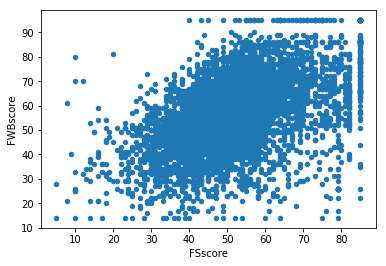

In [11]:
# FSscore -> FWBscore
fk_fwb.plot.scatter(x='FSscore',y='FWBscore')

In [12]:
np.corrcoef(fk_fwb['FSscore'],fk_fwb['FWBscore'])[0,1]

0.49412541650151987

Text(0.5,1,'I could handle a major unexpected expense. vs. Financial Skill Score')

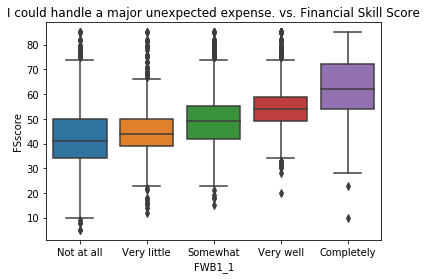

In [31]:
# FSscore -> FWB1_1
temp_data = fk_fwb.sort_values('FWB1_1').replace(value_map)
plt.figure()
sns.boxplot(x='FWB1_1',y='FSscore',data=temp_data
           ).set_title(col_map['FWB1_1']+' vs. Financial Skill Score')

In [35]:
np.corrcoef(fk_fwb['FSscore'],fk_fwb['FWB1_1'])[0,1]

0.49285346847486727

Text(0.5,1,'I am just getting by financially vs. Financial Skill Score')

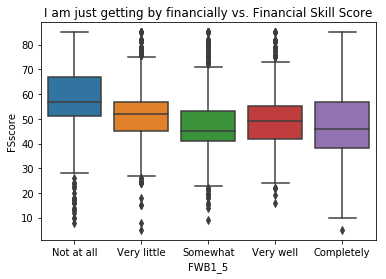

In [32]:
# FSscore -> FWB1_5
temp_data = fk_fwb.sort_values('FWB1_5').replace(value_map)
plt.figure()
sns.boxplot(x='FWB1_5',y='FSscore',data=temp_data
           ).set_title(col_map['FWB1_5']+' vs. Financial Skill Score')

In [36]:
np.corrcoef(fk_fwb['FSscore'],fk_fwb['FWB1_5'])[0,1]

-0.27214905860155825

Text(0.5,1,'Federal Poverty Level vs. Financial Skill Score')

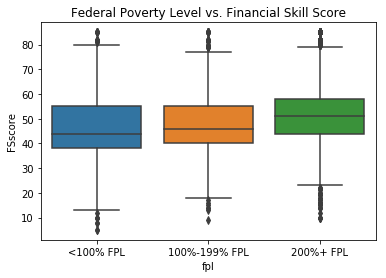

In [33]:
# FSscore -> fpl
temp_data = fk_fwb.sort_values('fpl').replace(value_map)
plt.figure()
sns.boxplot(x='fpl',y='FSscore',data=temp_data
           ).set_title(col_map['fpl']+' vs. Financial Skill Score')

In [37]:
np.corrcoef(fk_fwb['FSscore'],fk_fwb['fpl'])[0,1]

0.15791056632609465

Findings...

#### ======== II. Financial knowledge -> Homeownership ========

In [39]:
fk_home = cfpb_filtered_df.loc[:,fin_know_cols+homeown_cols]
fk_home = fk_home[fk_home['FSscore'] > 0]  # Remove NaNs
fk_home = fk_home[fk_home['FS2_3'] > 0]  # Remove NaNs
fk_home = fk_home[fk_home['SUBKNOWL1'] > 0]  # Remove NaNs
fk_home = fk_home[fk_home['HOUSING'] > 0]  # Remove NaNs
fk_home = fk_home[fk_home['HOUSERANGES'] > 0]  # Remove NaNs
fk_home = fk_home[fk_home['HOUSERANGES'] < 90]  # Remove NaNs
fk_home = fk_home[fk_home['MORTGAGE'] != -1]  # Remove NaNs
fk_home = fk_home[fk_home['MORTGAGE'] < 90]  # Remove NaNs

Text(0.5,1,'Which one of the following best describes your housing situation? vs. Financial Skill Score')

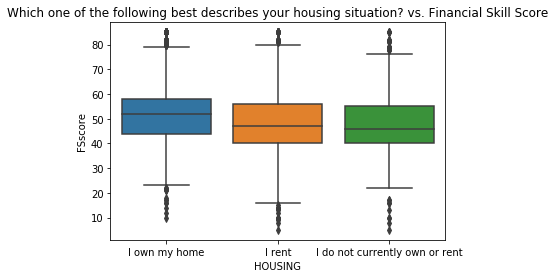

In [42]:
# FSscore -> HOUSING
temp_data = fk_home.sort_values('HOUSING').replace(value_map)
plt.figure()
sns.boxplot(x='HOUSING',y='FSscore',data=temp_data
           ).set_title(col_map['HOUSING']+' vs. Financial Skill Score')

In [57]:
np.corrcoef(fk_home['FSscore'],fk_home['HOUSING'])[0,1]

-0.17093294965080927

Text(0.5,1,'About how much do you pay for your home each month? vs. Financial Skill Score')

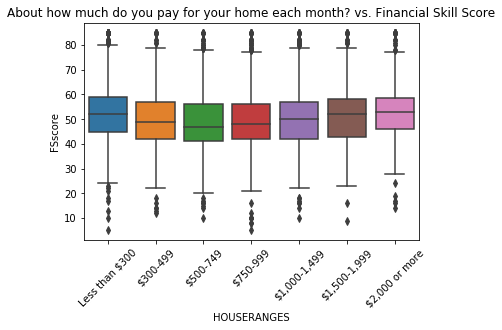

In [54]:
# FSscore -> HOUSERANGES
temp_data = fk_home.sort_values('HOUSERANGES').replace(value_map)
plt.figure()
ax = sns.boxplot(x='HOUSERANGES',y='FSscore',data=temp_data)
plt.setp(ax.get_xticklabels(),rotation=45)
ax.set_title(col_map['HOUSERANGES']+' vs. Financial Skill Score')

In [58]:
np.corrcoef(fk_home['FSscore'],fk_home['HOUSERANGES'])[0,1]

0.01316915590583048

Text(0.5,1,'What do you owe on your home? vs. Financial Skill Score')

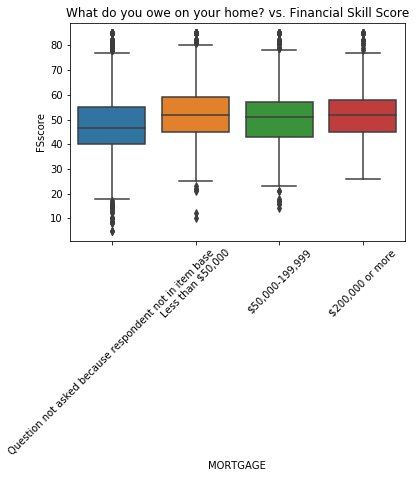

In [55]:
# FSscore -> MORTGAGE
temp_data = fk_home.sort_values('MORTGAGE').replace(value_map)
plt.figure()
ax = sns.boxplot(x='MORTGAGE',y='FSscore',data=temp_data)
plt.setp(ax.get_xticklabels(),rotation=45)
ax.set_title(col_map['MORTGAGE']+' vs. Financial Skill Score')

In [59]:
np.corrcoef(fk_home['FSscore'],fk_home['MORTGAGE'])[0,1]

0.16506624126213343

Findings...

#### ======== III. Financial knowledge -> Debt ========

In [66]:
fk_debt = cfpb_filtered_df.loc[:,fin_know_cols+debt_cols]
fk_debt = fk_debt[fk_debt['FSscore'] > 0]  # Remove NaNs
fk_debt = fk_debt[fk_debt['FS2_3'] > 0]  # Remove NaNs
fk_debt = fk_debt[fk_debt['SUBKNOWL1'] > 0]  # Remove NaNs
fk_debt = fk_debt[fk_debt['MANAGE1_1'] > 0]  # Remove NaNs
fk_debt = fk_debt[fk_debt['MANAGE1_3'] > 0]  # Remove NaNs

Text(0.5,1,'Student/Education Loan (for yourself or someone else) vs. Financial Skill Score')

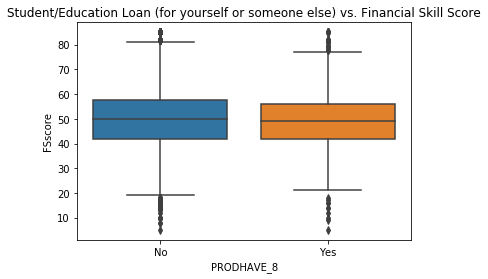

In [68]:
# FSscore -> PRODHAVE_8
temp_data = fk_debt.sort_values('PRODHAVE_8').replace(value_map)
plt.figure()
ax = sns.boxplot(x='PRODHAVE_8',y='FSscore',data=temp_data)
ax.set_title(col_map['PRODHAVE_8']+' vs. Financial Skill Score')

In [77]:
np.corrcoef(fk_debt['FSscore'],fk_debt['PRODHAVE_8'])[0,1]

-0.048099161125668734

Text(0.5,1,'Used payday loan or cash advance loan vs. Financial Skill Score')

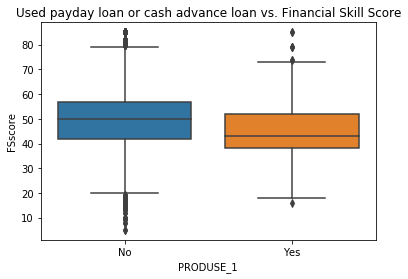

In [71]:
# FSscore -> PRODUSE_1
temp_data = fk_debt.sort_values('PRODUSE_1').replace(value_map)
plt.figure()
ax = sns.boxplot(x='PRODUSE_1',y='FSscore',data=temp_data)
ax.set_title(col_map['PRODUSE_1']+' vs. Financial Skill Score')

In [78]:
np.corrcoef(fk_debt['FSscore'],fk_debt['PRODUSE_1'])[0,1]

-0.076381297591166533

Text(0.5,1,'Used pawn loan or auto title loan vs. Financial Skill Score')

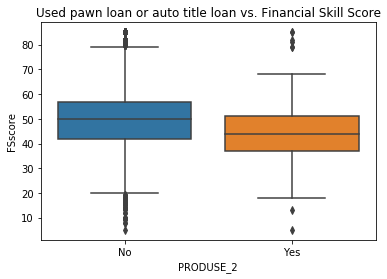

In [72]:
# FSscore -> PRODUSE_2
temp_data = fk_debt.sort_values('PRODUSE_2').replace(value_map)
plt.figure()
ax = sns.boxplot(x='PRODUSE_2',y='FSscore',data=temp_data)
ax.set_title(col_map['PRODUSE_2']+' vs. Financial Skill Score')

In [79]:
np.corrcoef(fk_debt['FSscore'],fk_debt['PRODUSE_2'])[0,1]

-0.063296851655703437

Text(0.5,1,'Paid all your bills on time vs. Financial Skill Score')

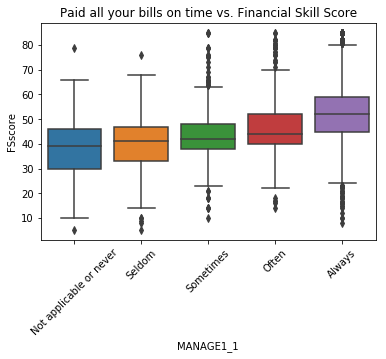

In [74]:
# FSscore -> MANAGE1_1
temp_data = fk_debt.sort_values('MANAGE1_1').replace(value_map)
plt.figure()
ax = sns.boxplot(x='MANAGE1_1',y='FSscore',data=temp_data)
plt.setp(ax.get_xticklabels(),rotation=45)
ax.set_title(col_map['MANAGE1_1']+' vs. Financial Skill Score')

In [80]:
np.corrcoef(fk_debt['FSscore'],fk_debt['MANAGE1_1'])[0,1]

0.32546000668700376

Text(0.5,1,'Paid off credit card balance in full vs. Financial Skill Score')

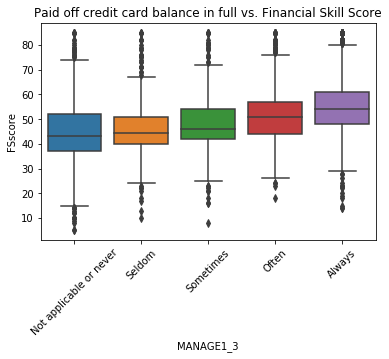

In [76]:
# FSscore -> MANAGE1_3
temp_data = fk_debt.sort_values('MANAGE1_3').replace(value_map)
plt.figure()
ax = sns.boxplot(x='MANAGE1_3',y='FSscore',data=temp_data)
plt.setp(ax.get_xticklabels(),rotation=45)
ax.set_title(col_map['MANAGE1_3']+' vs. Financial Skill Score')

In [81]:
np.corrcoef(fk_debt['FSscore'],fk_debt['MANAGE1_3'])[0,1]

0.37342611646191426

Key findings...

#### ======== IV. Financial knowledge -> Savings ========

In [85]:
fk_sv = cfpb_filtered_df.loc[:,fin_know_cols+savings_cols]
fk_sv = fk_sv[fk_sv['FSscore'] > 0]  # Remove NaNs
fk_sv = fk_sv[fk_sv['FS2_3'] > 0]  # Remove NaNs
fk_sv = fk_sv[fk_sv['SUBKNOWL1'] > 0]  # Remove NaNs
fk_sv = fk_sv[fk_sv['SAVEHABIT'] > 0]  # Remove NaNs
fk_sv = fk_sv[fk_sv['SAVINGSRANGES'] > 0]  # Remove NaNs
fk_sv = fk_sv[fk_sv['SAVINGSRANGES'] < 90]  # Remove NaNs

Text(0.5,1,'Putting money into savings is a habit for me vs. Financial Skill Score')

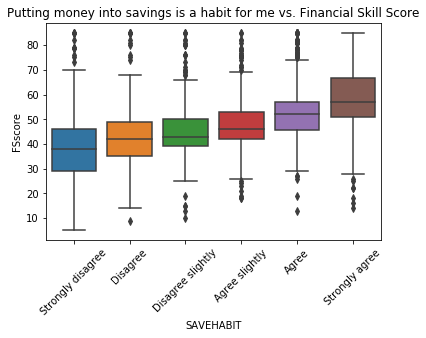

In [87]:
# FSscore -> SAVEHABIT
temp_data = fk_sv.sort_values('SAVEHABIT').replace(value_map)
plt.figure()
ax = sns.boxplot(x='SAVEHABIT',y='FSscore',data=temp_data)
plt.setp(ax.get_xticklabels(),rotation=45)
ax.set_title(col_map['SAVEHABIT']+' vs. Financial Skill Score')

In [89]:
np.corrcoef(fk_sv['FSscore'],fk_sv['SAVEHABIT'])[0,1]

0.47845661927939909

Text(0.5,1,'How much money do you have in savings today? vs. Financial Skill Score')

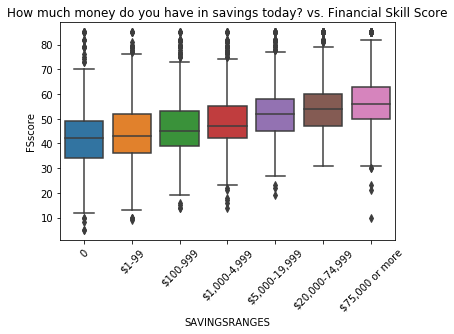

In [88]:
# FSscore -> SAVINGSRANGES
temp_data = fk_sv.sort_values('SAVINGSRANGES').replace(value_map)
plt.figure()
ax = sns.boxplot(x='SAVINGSRANGES',y='FSscore',data=temp_data)
plt.setp(ax.get_xticklabels(),rotation=45)
ax.set_title(col_map['SAVINGSRANGES']+' vs. Financial Skill Score')

In [90]:
np.corrcoef(fk_sv['FSscore'],fk_sv['SAVINGSRANGES'])[0,1]

0.36299303287523277

Key findings...

## Does financial knowledge have any relationship with a sub-population's financial well-being? Does it differ from the general population?

In [91]:
demographic_cols = ['PUF_ID','PPGENDER','PPETHM','agecat','PPEDUC',
                    'PPHHSIZE','PPREG4','PPREG9']

#### ======== I. Financial knowledge -> Financial well-being ========

#### ======== II. Financial knowledge -> Housing ========

#### ======== III. Financial knowledge -> Debt ========

#### ======== IV. Financial knowledge -> Savings ========

## If there is a difference, is there additional data we can explore? Is there a possible explanation or reasoning for such difference?

## What conclusions can we draw?

## Are there any recommendations we can make to public and private institutions to efficiently allocate resources to make the largest difference for the groups observed?